In [13]:
%matplotlib inline
from numpy import nan
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.linear_model import LinearRegression

theme_colors = ['#F9B1B8',  '#EE4355',  '#B60618','#820815']

color_palette = ['#FFFFFF', '#F9B1B8', '#EE4355', '#B60618', '#820815', '#000000']

font = 'Courier New'

df = pd.read_csv("heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [15]:
df.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.540305,240.581699,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,17.989941,53.982967,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,80.000000,85.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,214.000000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [69]:
df.shape

(918, 12)

In [5]:
counts = df.groupby('ST_Slope').size()

print (counts)

ST_Slope
Down     63
Flat    460
Up      395
dtype: int64


In [6]:
ml = df[(df.Sex == 'M')] # grouping by sex
ml.shape

(725, 12)

In [7]:
ml1 = df[(df.Sex == 'F')]
ml1.shape

(193, 12)

In [7]:
sex_count = df.groupby(['Sex']).size().reset_index().rename(columns={0: 'count'})
cp_count = df.groupby(['ChestPainType']).size().reset_index().rename(columns={0: 'count'})
fasting_bs_count = df.groupby(['FastingBS']).size().reset_index().rename(columns={0: 'count'})
resting_ecg_count = df.groupby(['RestingECG']).size().reset_index().rename(columns={0: 'count'})
angina_count = df.groupby(['ExerciseAngina']).size().reset_index().rename(columns={0: 'count'})
st_slope_count = df.groupby(['ST_Slope']).size().reset_index().rename(columns={0: 'count'})

fig = make_subplots(rows=3, cols=2,
                    specs=[[{'type':'domain'}, {'type':'domain'}],
                           [{'type':'domain'}, {'type':'domain'}],
                           [{'type':'domain'}, {'type':'domain'}]
                          ])


## Sex Donut Chart
fig.add_trace(
    go.Pie(
        labels=sex_count['Sex'],
        values=sex_count['count'],
        hole=.6,
        title='Sex',
        titlefont={'color':None, 'size': 24},       
        ),
    row=1,col=1
    )

## Chest Pain Type Donut Chart
fig.add_trace(
    go.Pie(
        labels=cp_count['ChestPainType'],
        values=cp_count['count'],
        hole=.6,
        title='Chest Pain Type',
        titlefont={'color':None, 'size': 24},
        ),
    row=1,col=2
    )

## Fasting Blood Sugar Donut Chart
fig.add_trace(
    go.Pie(
        labels=fasting_bs_count['FastingBS'],
        values=fasting_bs_count['count'],
        hole=.6,
        title='Fasting Blood Sugar',
        titlefont={'color':None, 'size': 24},
        ),
    row=2,col=1
    )


## RestingECG Donut Chart
fig.add_trace(
    go.Pie(
        labels=resting_ecg_count['RestingECG'],
        values=resting_ecg_count['count'],
        hole=.6,
        title='Resting ECG',
        titlefont={'color':None, 'size': 24},
        ),
    row=2,col=2
    )

## ExerciseAngina Donut Chart
fig.add_trace(
    go.Pie(
        labels=angina_count['ExerciseAngina'],
        values=angina_count['count'],
        hole=.6,
        title='Exercise Angina',
        titlefont={'color':None, 'size': 24},
        ),
    row=3,col=1
    )

## ST_Slope Donut Chart
fig.add_trace(
    go.Pie(
        labels=st_slope_count['ST_Slope'],
        values=st_slope_count['count'],
        hole=.6,
        title='ST Slope',
        titlefont={'color':None, 'size': 24},
        ),
    row=3,col=2
    )

fig.update_traces(
    hoverinfo='label+value',
    textinfo='label+percent',
    textfont_size=12,
    marker=dict(
        colors=theme_colors,
        line=dict(color='#EEEEEE',
                  width=2)
        )
    )


fig.layout.update(title="<b> Categorical Features Donut Charts <b>",
                  titlefont={'color':None, 'size': 24, 'family': 'Courier New'},
                  showlegend=False, 
                  height=1000, 
                  width=1000,
#                   paper_bgcolor="#333333",
                  template='plotly_dark',
                  title_x=0.5
                  )
fig.show()

NameError: name 'white' is not defined

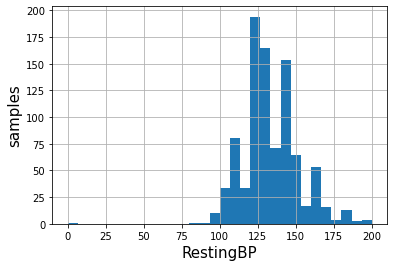

In [11]:
RestingBP=df['RestingBP']
RestingBP.hist(histtype='stepfilled', bins=30)
plt.xlabel('RestingBP',fontsize=15)
plt.ylabel('samples',fontsize=15)
plt.show()

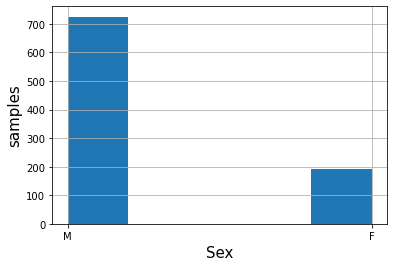

In [72]:
sex=df['Sex']
sex.hist(histtype='stepfilled', bins=5)
plt.xlabel('Sex',fontsize=15)
plt.ylabel('samples',fontsize=15)
plt.show()

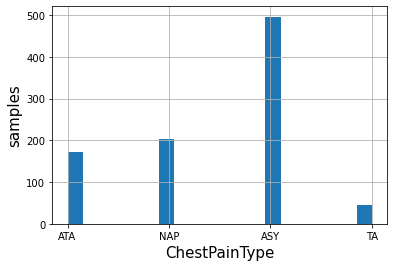

In [23]:
cpt=df['ChestPainType']
cpt.hist(histtype='stepfilled', bins=20)
plt.xlabel('ChestPainType',fontsize=15)
plt.ylabel('samples',fontsize=15)
plt.show()

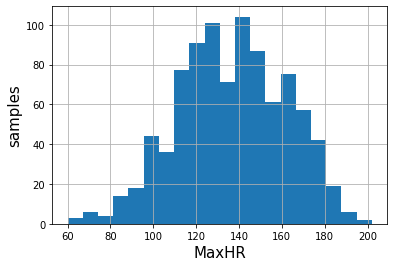

In [12]:
Max=df['MaxHR']
Max.hist(histtype='stepfilled', bins=20)
plt.xlabel('MaxHR',fontsize=15)
plt.ylabel('samples',fontsize=15)
plt.show()

In [74]:
df.notnull().sum()

Age               918
Sex               918
ChestPainType     918
RestingBP         918
Cholesterol       918
FastingBS         918
RestingECG        918
MaxHR             918
ExerciseAngina    918
Oldpeak           918
ST_Slope          918
HeartDisease      918
dtype: int64

In [75]:
Cholesterol = df[(df.Cholesterol == 0)]
Cholesterol

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [76]:
print(df['Cholesterol'].mean())
print(df['Cholesterol'].median())

198.7995642701525
223.0


In [77]:
Cho_med = df['Cholesterol'].median()
Cho_med

223.0

In [84]:
n=df['Cholesterol']
n2=n.replace('0', '233')
print(n2)

0      289
1      180
2      283
3      214
4      195
      ... 
913    264
914    193
915    131
916    236
917    175
Name: Cholesterol, Length: 918, dtype: int64


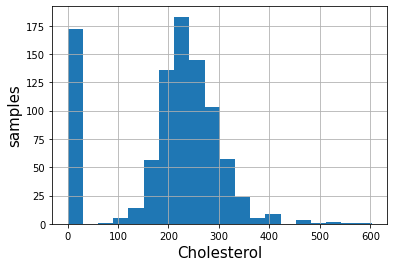

In [85]:
cho=n2
cho.hist(histtype='stepfilled', bins=20)
plt.xlabel('Cholesterol',fontsize=15)
plt.ylabel('samples',fontsize=15)
plt.show()